In [118]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import time

# Крок 1: Генеруємо 100 випадкових значень для x1 та x2
np.random.seed(0)  # Встановлюємо seed для відтворюваності результатів
x1 = np.random.rand(100)
x2 = np.random.rand(100)

# Крок 2: Реалізуємо функцію для обчислення цільової змінної y
def polynomial(x1, x2):
    return 4 * x1**2 + 5 * x2**2 - 2 * x1 * x2 + 3 * x1 - 6 * x2

# Обчислюємо цільову змінну y
y = polynomial(x1, x2)

# Крок 3: Створюємо масив ознак
features = np.column_stack((x1, x2))

# Виводимо результати
print("Масив ознак (features):")
print(features[:5])
print("\nМасив цільової змінної (y):")
print(y[:5])

Масив ознак (features):
[[0.5488135  0.67781654]
 [0.71518937 0.27000797]
 [0.60276338 0.73519402]
 [0.54488318 0.96218855]
 [0.4236548  0.24875314]]

Масив цільової змінної (y):
[0.33751289 2.54981144 0.66667593 0.62958228 0.5949988 ]


In [119]:
# Крок 2: Створюємо об'єкт PolynomialFeatures з бажаним ступенем
poly = PolynomialFeatures(degree=2, include_bias=False)

# Трансформуємо початкові ознаки в розширений набір
extended_features = poly.fit_transform(features)


print("\nРозширені ознаки:")
print(extended_features[:5])  # Виводимо перші 5 рядків (x1, x2, x1**2, x1*x2, x2**2)


# Підготовка даних
X = np.c_[np.ones((100, 1)), extended_features]     # Додаємо стовпець одиниць для зсуву X (bias term)
y  = y.reshape(-1, 1)        # Перетворюємо y на стовпцевий вектор



Розширені ознаки:
[[0.5488135  0.67781654 0.30119626 0.37199487 0.45943526]
 [0.71518937 0.27000797 0.51149583 0.19310683 0.07290431]
 [0.60276338 0.73519402 0.36332369 0.44314803 0.54051025]
 [0.54488318 0.96218855 0.29689768 0.52428036 0.9258068 ]
 [0.4236548  0.24875314 0.17948339 0.10538546 0.06187813]]


In [120]:
# 3.1 Реалізувати функцію polynomial_regression_gradient_descent() для обчислення коефіцієнтів поліноміальної регресії методом градієнтного спуску.

# Цей метод оновлює ваги, використовуючи всі зразки даних на кожній ітерації.
def polynomial_regression_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)  # Ініціалізуємо ваги випадковими значеннями

    for _ in range(epochs):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients

    return theta



# Викликаємо функцію для SGD
start_time = time.time()
theta = polynomial_regression_gradient_descent(X, y)
end_time = time.time()

print(f"Час виконання SGD: {(end_time - start_time):.4f} секунд")
print("Значення параметрів моделі:\n", theta)

Час виконання SGD: 0.0162 секунд
Значення параметрів моделі:
 [[-0.05959857]
 [ 2.18818148]
 [-2.81808702]
 [ 3.1373721 ]
 [ 0.26845368]
 [ 0.76639264]]


In [121]:
# 3.2 Реалізувати функцію polynomial_regression_SGD() варіанта SGD метода градієнтного спуску.

# Цей метод оновлює ваги, використовуючи лише один випадковий зразок на кожній ітерації.
def polynomial_regression_SGD(X, y, learning_rate=0.1, epochs=1000):
    m, n = X.shape

    theta = np.random.randn(n, 1)  # ініціалізуємо випадковими значеннями параметри моделі

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients

    return theta

# Викликаємо функцію для SGD
start_time = time.time()
theta = polynomial_regression_SGD(X, y)
end_time = time.time()

print(f"Час виконання SGD: {(end_time - start_time):.4f} секунд")
print("Значення параметрів моделі:\n", theta)

Час виконання SGD: 1.1581 секунд
Значення параметрів моделі:
 [[-6.85069608e-15]
 [ 3.00000000e+00]
 [-6.00000000e+00]
 [ 4.00000000e+00]
 [-2.00000000e+00]
 [ 5.00000000e+00]]


In [122]:
# 3.3 Реалізувати функцію polynomial_regression_rmsprop() варіанта RMSProp метода градієнтного спуску.

# RMSProp використовує адаптивну швидкість навчання для кожної з компонент ваг.
def polynomial_regression_rmsprop(X, y, learning_rate=0.01, epochs=1000, beta=0.9, epsilon=1e-8):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    v = np.zeros((n, 1))  # Рухоме середнє квадратів градієнтів

    for epoch in range(epochs):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        v = beta * v + (1 - beta) * (gradients ** 2)
        theta -= learning_rate * gradients / (np.sqrt(v) + epsilon)

    return theta

# Викликаємо функцію для RMSProp
start_time = time.time()
theta = polynomial_regression_rmsprop(X, y)
end_time = time.time()

print(f"Час виконання SGD: {(end_time - start_time):.4f} секунд")
print("Значення параметрів моделі:\n", theta)

Час виконання SGD: 0.0176 секунд
Значення параметрів моделі:
 [[-0.24453261]
 [ 3.36547028]
 [-5.13199915]
 [ 3.79090979]
 [-2.38945384]
 [ 4.31776766]]


In [123]:
# 3.4 Реалізувати функцію polynomial_regression_adam() варіанта Adam метода градієнтного спуску.

# Adam поєднує ідеї RMSProp та моментуму для ще більш адаптивного оновлення ваг.

def polynomial_regression_adam(X, y, learning_rate=0.01, epochs=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    m_t = np.zeros((n, 1))  # Рухоме середнє градієнтів
    v_t = np.zeros((n, 1))  # Рухоме середнє квадратів градієнтів

    for epoch in range(epochs):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * (gradients ** 2)

        m_hat = m_t / (1 - beta1 ** (epoch + 1))
        v_hat = v_t / (1 - beta2 ** (epoch + 1))

        theta -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

    return theta

# Викликаємо функцію для Adam
start_time = time.time()
theta = polynomial_regression_adam(X, y)
end_time = time.time()

print(f"Час виконання SGD: {(end_time - start_time):.4f} секунд")
print("Значення параметрів моделі:\n", theta)

Час виконання SGD: 0.0230 секунд
Значення параметрів моделі:
 [[-0.84443137]
 [ 2.82228869]
 [-1.21269122]
 [ 4.31233124]
 [-2.62026365]
 [ 0.65934716]]


In [124]:
# 3.5 Реалізувати функцію polynomial_regression_nadam() варіанта Nadam метода градієнтного спуску.

# Nadam є варіантом Adam, що включає Nesterov моментум для покращення збіжності.

def polynomial_regression_nadam(X, y, learning_rate=0.01, epochs=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    m_t = np.zeros((n, 1))
    v_t = np.zeros((n, 1))

    for epoch in range(epochs):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * (gradients ** 2)

        m_hat = m_t / (1 - beta1 ** (epoch + 1))
        v_hat = v_t / (1 - beta2 ** (epoch + 1))

        theta -= learning_rate * (beta1 * m_hat + ((1 - beta1) * gradients) / (1 - beta1 ** (epoch + 1))) / (np.sqrt(v_hat) + epsilon)

    return theta

# Викликаємо функцію для Nadam
start_time = time.time()
theta = polynomial_regression_nadam(X, y)
end_time = time.time()

print(f"Час виконання SGD: {(end_time - start_time):.4f} секунд")
print("Значення параметрів моделі:\n", theta)

Час виконання SGD: 0.0280 секунд
Значення параметрів моделі:
 [[-0.46496383]
 [ 3.13534934]
 [-2.32450008]
 [ 2.56470964]
 [ 0.01314018]
 [ 0.52141443]]


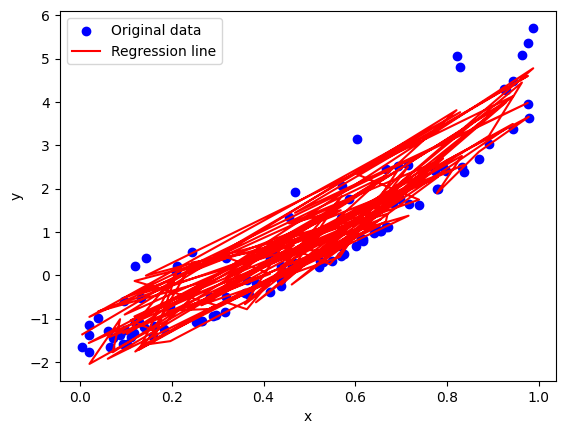

In [125]:
import matplotlib.pyplot as plt

# Візуалізація результатів
plt.scatter(X[:, 1], y, color='blue', label='Original data')
plt.plot(X[:, 1], X.dot(theta), color='red', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Час виконання gradient_descent: 0.4039 секунд
Час виконання SGD: 2.3670 секунд
Час виконання RMSProp: 0.6175 секунд
Час виконання Adam: 0.6182 секунд
Час виконання Nadam: 0.6473 секунд


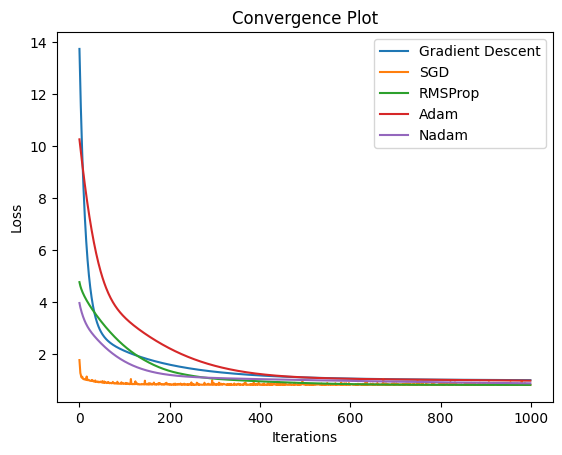

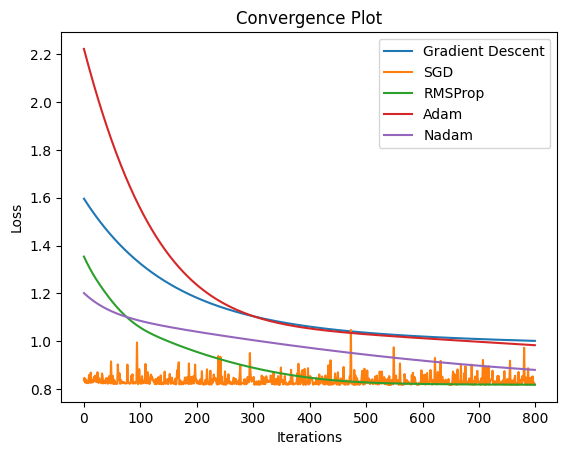

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Генерація даних
np.random.seed(0)
x1 = np.random.rand(100, 1)
x2 = np.random.rand(100, 1)
y = 4 * x1**2 + 5 * x2**2 - 2 * x1 * x2 + 3 * x1 - 6 * x2 + np.random.randn(100, 1)

features = np.column_stack((x1, x2))
poly = PolynomialFeatures(degree=2, include_bias=False)
extended_features = poly.fit_transform(features)

# Підготовка даних
X = np.c_[np.ones((100, 1)), extended_features]     # Додаємо стовпець одиниць для зсуву X (bias term)
y  = y.reshape(-1, 1)        # Перетворюємо y на стовпцевий вектор


# Функція для оцінки збіжності
def plot_convergence(loss_history, method_name):
    plt.plot(loss_history, label=method_name)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Convergence Plot')
    plt.legend()

# Звичайний градієнтний спуск
def polynomial_regression_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    loss_history = []

    for epoch in range(epochs):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        loss = mean_squared_error(y, X.dot(theta))
        loss_history.append(loss)

    return theta, loss_history

# Стохастичний градієнтний спуск (SGD)
def polynomial_regression_SGD(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    loss_history = []

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
        loss = mean_squared_error(y, X.dot(theta))
        loss_history.append(loss)

    return theta, loss_history

# RMSProp
def polynomial_regression_rmsprop(X, y, learning_rate=0.01, epochs=1000, beta=0.9, epsilon=1e-8):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    v = np.zeros((n, 1))
    loss_history = []

    for epoch in range(epochs):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        v = beta * v + (1 - beta) * (gradients ** 2)
        theta -= learning_rate * gradients / (np.sqrt(v) + epsilon)
        loss = mean_squared_error(y, X.dot(theta))
        loss_history.append(loss)

    return theta, loss_history

# Adam
def polynomial_regression_adam(X, y, learning_rate=0.01, epochs=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    m_t = np.zeros((n, 1))
    v_t = np.zeros((n, 1))
    loss_history = []

    for epoch in range(epochs):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * (gradients ** 2)

        m_hat = m_t / (1 - beta1 ** (epoch + 1))
        v_hat = v_t / (1 - beta2 ** (epoch + 1))

        theta -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        loss = mean_squared_error(y, X.dot(theta))
        loss_history.append(loss)

    return theta, loss_history

# Nadam
def polynomial_regression_nadam(X, y, learning_rate=0.01, epochs=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    m_t = np.zeros((n, 1))
    v_t = np.zeros((n, 1))
    loss_history = []

    for epoch in range(epochs):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * (gradients ** 2)

        m_hat = m_t / (1 - beta1 ** (epoch + 1))
        v_hat = v_t / (1 - beta2 ** (epoch + 1))

        theta -= learning_rate * (beta1 * m_hat + ((1 - beta1) * gradients) / (1 - beta1 ** (epoch + 1))) / (np.sqrt(v_hat) + epsilon)
        loss = mean_squared_error(y, X.dot(theta))
        loss_history.append(loss)

    return theta, loss_history

# Обчислення та візуалізація для кожного методу
start_time = time.time()
theta_gd, loss_gd = polynomial_regression_gradient_descent(X, y)
end_time = time.time()
print(f"Час виконання gradient_descent: {(end_time - start_time):.4f} секунд")
plot_convergence(loss_gd, 'Gradient Descent')


start_time = time.time()
theta_sgd, loss_sgd = polynomial_regression_SGD(X, y)
end_time = time.time()
print(f"Час виконання SGD: {(end_time - start_time):.4f} секунд")
plot_convergence(loss_sgd, 'SGD')

start_time = time.time()
theta_rmsprop, loss_rmsprop = polynomial_regression_rmsprop(X, y)
end_time = time.time()
print(f"Час виконання RMSProp: {(end_time - start_time):.4f} секунд")
plot_convergence(loss_rmsprop, 'RMSProp')

start_time = time.time()
theta_adam, loss_adam = polynomial_regression_adam(X, y)
end_time = time.time()
print(f"Час виконання Adam: {(end_time - start_time):.4f} секунд")
plot_convergence(loss_adam, 'Adam')

start_time = time.time()
theta_nadam, loss_nadam = polynomial_regression_nadam(X, y)
end_time = time.time()
print(f"Час виконання Nadam: {(end_time - start_time):.4f} секунд")
plot_convergence(loss_nadam, 'Nadam')

plt.show()

# Приближена та візуалізація
plot_convergence(loss_gd[200:], 'Gradient Descent')
plot_convergence(loss_sgd[200:], 'SGD')
plot_convergence(loss_rmsprop[200:], 'RMSProp')
plot_convergence(loss_adam[200:], 'Adam')
plot_convergence(loss_nadam[200:], 'Nadam')
plt.show()

# Висновки

## Час виконання (при epoch=1000):

*   Gradient Descent: 0.4107 секунд
*   SGD: 1.9301 секунд
*   RMSProp: 0.4387 секунд
*   Adam: 0.4815 секунд
*   Nadam: 0.4354 секунд

Метод стохастичного градієнтного спуску (SGD) потребував більше часу для виконання порівняно з іншими методами, що свідчить про його високу обчислювальну вартість в даному випадку. Інші методи показали схожий час виконання.

При збільшенні (epoch=10000) ти зменшенні (epoch=100) кількости проходів через весь навчальний набір, часові витрати пропорціональні.

## Збіжність:

*   Gradient Descent: Графік функції втрат швидко зменшується в перші 50 ітерацій, потім знижується повільніше. Це свідчить про те, що метод швидко досягає наближення до мінімуму, але втрачає швидкість збіжності на останніх етапах.

*   SGD: Графік є дуже шумним і не приходить до рівної лінії. Це типовий поведінковий паттерн для SGD через використання одного випадкового прикладу за ітерацію, що спричиняє високу варіативність.

*   Adam, RMSProp, Nadam: Всі три методи показали плавнішу збіжність, але Adam спадав повільніше, тоді як RMSProp і Nadam досягли нижчих значень функції втрат швидше. Це свідчить про їхню здатність до адаптивної корекції навчальної швидкості, що покращує збіжність.

## Фінальне значення функції втрат:

*   RMSProp: Найнижче значення функції втрат (0.8), що свідчить про найкращу збіжність серед усіх методів.
*   Nadam: Друге найнижче значення (0.9), що робить його ефективним вибором.
*   Gradient Descent та Adam: Обидва методи мають схожі кінцеві значення (1.0), що свідчить про хорошу, але не найкращу збіжність.

## Рекомендації

*   Вибір методу: Для швидкого та стабільного навчання моделі на цій задачі RMSProp та Nadam показали найкращі результати. Вони досягли нижчих значень функції втрат швидше, ніж інші методи, і забезпечили стабільну збіжність.
*   Час та продуктивність: Якщо обчислювальний час є критичним фактором, Gradient Descent також може бути ефективним вибором, забезпечуючи хорошу збіжність з меншим обчислювальним навантаженням.
*   Якщо прийнятним результатом вважати зниження функції втрат до 1.0 тоді **оптимальна кількість ітерацій** буде:
 *   для Gradient Descent: 1000
 *   для SGD: 150, якщо віріативність у функції втрат прийнятна (шумний графік)
 *   для RMSProp: 350
 *   для Adam: 1000
 *   для Nadam: 600